<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
### <center> ссылка на датасет: https://drive.google.com/file/d/1eVyxut6nsk1NH83wsJ0Dqubr5r3feGP1/view?usp=sharing
   

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [272]:
hh_df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

---

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [273]:
display(hh_df.head())

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


---

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [274]:
duplicates = hh_df[hh_df.duplicated(subset=hh_df.columns)]
print(duplicates.shape[0])

153


In [275]:
hh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

---

4. Обратите внимание на информацию о числе непустых значений.

In [276]:
is_null = hh_df.isnull().any(axis=1).value_counts()[True]
non_null = hh_df.isnull().any(axis=0)
empty_columns = list(non_null[non_null == True].index)

print(f'Число непустых значений в колонке при отсутсвии пропусков {hh_df.shape[0]}. \
Пустые значения находятся в колонках: {empty_columns}, совокупное количество пропусков {is_null}. \
Размерность таблицы: {hh_df.shape}')


Число непустых значений в колонке при отсутсвии пропусков 44744. Пустые значения находятся в колонках: ['Опыт работы', 'Последнее/нынешнее место работы', 'Последняя/нынешняя должность'], совокупное количество пропусков 170. Размерность таблицы: (44744, 12)


---

5. Выведите основную статистическую информацию о столбцах.


In [277]:
hh_df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


---

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [278]:
def education_level(data):
    ed_list = data.split(sep=' ')[:2]
    
    if ed_list[1] == 'образование':
        ed_list.pop() 
    
    ed_str = ' '.join(ed_list)
    
    return ed_str.capitalize()

hh_df['Образование'] = hh_df['Образование и ВУЗ'].apply(education_level)
hh_df.drop('Образование и ВУЗ', axis=1, inplace=True)

#Для ответа на контрольные вопросы
hh_df['Образование'].value_counts()

Высшее                 33863
Среднее специальное     5765
Неоконченное высшее     4557
Среднее                  559
Name: Образование, dtype: int64

---

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [279]:
def gender_age_splitter(data, gender_mode=True):
    data_mode = data.split(sep=',')[:2]
    
    if gender_mode:
        data_mode.pop()
        data_mode = data_mode[0].strip()
        
        if data_mode == 'Мужчина':
            data_mode = 'М'
        else:
            data_mode = 'Ж'
    
    else:
        data_mode = data_mode[1].strip().split(sep=' ')
        data_mode.pop()
        data_mode = int(data_mode[0])

    return data_mode

hh_df['Пол'] = hh_df['Пол, возраст'].apply(gender_age_splitter)
hh_df['Возраст'] = hh_df['Пол, возраст'].apply(gender_age_splitter, gender_mode=False)
hh_df.drop('Пол, возраст', axis=1, inplace=True)

#Для ответа на контрольные вопросы
gender_prop = round(hh_df['Пол'].value_counts(normalize=True)*100,2)
print(f'Половое распределение среди соискателей в %: {gender_prop}')

mean_age = round(hh_df['Возраст'].mean(),1)
print(f'Средний возраст соискателей: {mean_age}')

Половое распределение среди соискателей в %: М    80.93
Ж    19.07
Name: Пол, dtype: float64
Средний возраст соискателей: 32.2


---

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [280]:
def exp_transf(data):
    replace = [
    ('года', 'y'), ('год' , 'y'), ('лет', 'y'),
    ('месяцев', 'm'), ('месяца', 'm'),
    ('месяц', 'm'), 
    ('Опыт работы', '')
    ] 
    months = 0                                                        #пробуем нарезать строку по сепаратору, в случае возникновения оштбки
    try:                                                              #заполняем ячейку Nan, т.к. столкнулись с пропущенным значением
        data_slice = data.split(sep= ' ')[:7]                         #сначала разбиваем строку на список и делаем срез, включая +- нужный диапазон
        data_str = ' '.join(data_slice)                               #обхъединяем в строку
        for old, new in replace:                                      #заменяем ключевые слова на упрощенную классификацию год/месяц
            data_str = data_str.replace(old, new)
        
        data_str = data_str[:10]                                      #
        
        if 'm' in data_str and 'y' not in data_str:                   #создаем логику для отсечения попавших элементов строки с местом работы, etc.
            data_str = data_str[:6]
        elif 'm' not in data_str and 'y' in data_str:                 #
            data_str = data_str[:5]
        elif 'm' and 'y' in data_str:                                 #
            index = data_str.find('m')
            data_str = data_str[:index+1]
        
        data_slice2 = data_str.split(' ')                             #снова прогоняем через список с отсечением лишнего
        for i in data_slice2:
            if i == '':
                data_slice2.remove(i)
        
        if 'y' in data_slice2 and 'm' in data_slice2:                 #создаем логику и проверяем наличие ключевых слов в списке
            months = int(data_slice2[0])*12 + int(data_slice2[2])     #в зависимости от конфигурации списка, дергаем нужные элементы
        elif 'y' not in data_slice2 and 'm' in data_slice2:           #по индексу и производим нужные операции, в последующем загоняя
            months = round(int(data_slice2[0]))                       #полученные значения в переменную
        elif 'y' in data_slice2 and 'm' not in data_slice2:           #
            months = round(int(data_slice2[0])*12)                    #
        else:
            return np.nan
        
        return months
    
    except AttributeError:
        return np.nan
        

hh_df['Опыт работы (месяц)'] = hh_df['Опыт работы'].apply(exp_transf)
hh_df.drop('Опыт работы', axis=1, inplace=True)
median_exp = hh_df['Опыт работы (месяц)'].median()
print(f'Медианный опыт работы составляет: {median_exp} месяцев')

Медианный опыт работы составляет: 100.0 месяцев


---

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [281]:
def location_transf(data, city=False, relocation=False, trips=False):
    data_features = {
        'city' : '',
        'relocation' : '', 
        'trips' : ''
    }
    
    crutial_cities = [
        'Москва',
        'Санкт-Петербург'
    ]
    
    million_cities = [
    'Новосибирск', 'Екатеринбург','Нижний Новгород',
    'Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 
    'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград'
    ]
    
    feature = ''
    
    data_slice = data.split(sep=',')
    
    #Формирование признака город (через призваивание значения ключу словаря 'city')
    if data_slice[0].strip() in crutial_cities:
        data_slice[0] = data_slice[0].strip()
    elif data_slice[0].strip() in million_cities:
        data_slice[0] = 'город-миллионник'
    else:
        data_slice[0] = 'другие'
    data_features['city'] = data_slice[0]
    
    #Формирование признака переезд (через призваивание значения ключу словаря 'relocation')
    for element in data_slice:
        if 'переезду' in element.strip().split(' ')\
            or 'переехать'in element.strip().split(' '):
            if 'не' in element.strip().split(' '):
                data_features['relocation'] = False
            else:
                data_features['relocation'] = True
    
    #Формирование признака командировки (через призваивание значения ключу словаря 'trips')
    for element in data_slice:
        if 'командировкам' in element.strip().split(' '):
            if 'не' in element.strip().split(' '):
                data_features['trips'] = False
            else:
                data_features['trips'] = True
        else:
            data_features['trips'] = False
    
    #Выбор, в зависимости от модификации именованого аргумента, значения для заполнения
    if city:
        feature = data_features['city']
    elif relocation:
        feature = data_features['relocation']
    elif trips:
        feature = data_features['trips']
    else:
        feature = None
    
    return feature

hh_df['Город'] = hh_df['Город, переезд, командировки'].apply(location_transf, city=True)
hh_df['Готовность к переезду'] = hh_df['Город, переезд, командировки'].apply(location_transf, relocation=True)
hh_df['Готовность к командировкам'] = hh_df['Город, переезд, командировки'].apply(location_transf, trips=True)
hh_df.drop('Город, переезд, командировки', axis=1, inplace=True)

#Сколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого.
spb = round(hh_df['Город'].value_counts(normalize=True)*100)['Санкт-Петербург']
print(f'Процент соискателей проживающих в СпБ: {spb}%')

#Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого. 16444
x = hh_df['Готовность к переезду']==True
y = hh_df['Готовность к командировкам']==True
hh_df[x & y].shape[0]
answer = round((hh_df[x & y].shape[0] / hh_df.shape[0])*100)
print(f'{answer}% соискателей готовы одновременно и к переездам, и к командировкам')

Процент соискателей проживающих в СпБ: 11.0%
32% соискателей готовы одновременно и к переездам, и к командировкам


---

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [282]:
employment_list = [
    'частичная занятость',
    'полная занятость',
    'стажировка',
    'проектная работа',
    'волонтерство',
]

schedule_list = [
    'гибкий график',
    'полный день',
    'удаленная работа',
    'вахтовый метод',
    'сменный график'
]

for element in employment_list:
    hh_df[element] = hh_df['Занятость'].apply(lambda x: element in x)

for element in schedule_list:
    hh_df[element] = hh_df['График'].apply(lambda x: element in x) 

hh_df.drop('Занятость', axis=1, inplace=True)
hh_df.drop('График', axis=1, inplace=True)

#Сколько людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True)?
mask1 = hh_df['проектная работа'] == True
mask2 = hh_df['волонтерство'] == True
answer1 = hh_df[mask1 & mask2].shape[0]
print(answer1)
#Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?
mask3 = hh_df['вахтовый метод'] == True
mask4 = hh_df['гибкий график'] == True
answer2 = hh_df[mask3 & mask4].shape[0]
print(answer2)

436
2311


---

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [283]:
exrate_df = pd.read_csv('data/ExchangeRates.csv')
exrate_df.drop(['per', 'time', 'vol'], axis=1, inplace=True)

exrate_df['date'] = pd.to_datetime(exrate_df['date'])
hh_df['Обновление резюме'] = pd.to_datetime(hh_df['Обновление резюме']).dt.date
hh_df['Обновление резюме']= pd.to_datetime(hh_df['Обновление резюме'])

def currency_repl(data):
    cur_repl = [
    ('грн.','UAH'), ('USD','USD'), ('EUR','EUR'), ('бел.руб','BYN'),
    ('бел.RUB','BYN'), ('KGS','KGS'), ('сум','UZS'),
    ('AZN','AZN'), ('KZT','KZT'), ('руб.','RUB'), ('UAH.','UAH'),
    ('бел.RUB','BYN'), ('BYN.','BYN')]
    
    for old, new in cur_repl:
        data = data.replace(old, new)
    #data_slice = data.split(' ')
    return data

hh_df['ЗП'] = hh_df['ЗП'].apply(currency_repl)
hh_df['curr'] = hh_df['ЗП'].apply(lambda x: x.split(' ')[1] )
hh_df['amount'] = hh_df['ЗП'].apply(lambda x: x.split(' ')[0] )
hh_df['amount'] = hh_df['amount'].astype('float64')

hh_df_rub = pd.merge(
    left= hh_df,
    right= exrate_df,
    how='left',
    left_on=['Обновление резюме', 'curr'],
    right_on=['date', 'currency'],
)


hh_df_rub['close'].fillna(value=1, inplace=True)
hh_df_rub['proportion'].fillna(value=1, inplace=True)
hh_df_rub['currency'].fillna(value='RUB', inplace=True)
hh_df_rub['calc'] = hh_df_rub['amount'] * hh_df_rub['close'] / hh_df_rub['proportion']
hh_df_rub['calc'].fillna(value=hh_df_rub['amount'], inplace=True)
hh_df_rub['ЗП (руб)'] = hh_df_rub['calc']

hh_df_rub.drop([
    'curr', 'amount', 'currency', 'ЗП',
    'date', 'close', 'proportion', 'calc'],
    axis=1,
    inplace=True
)

head_hunter = hh_df_rub


#Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)?
#Ответ приведите в тысячах рублей и округлите до целого.

med = head_hunter['ЗП (руб)'].median()
print(f'Медианная заработная плата соискателей равна {med//1000} тыс.руб.')

Медианная заработная плата соискателей равна 59.0 тыс.руб.


---

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Максимальное значение: 100
Модальное значение: 30
Минимальное значение: 14


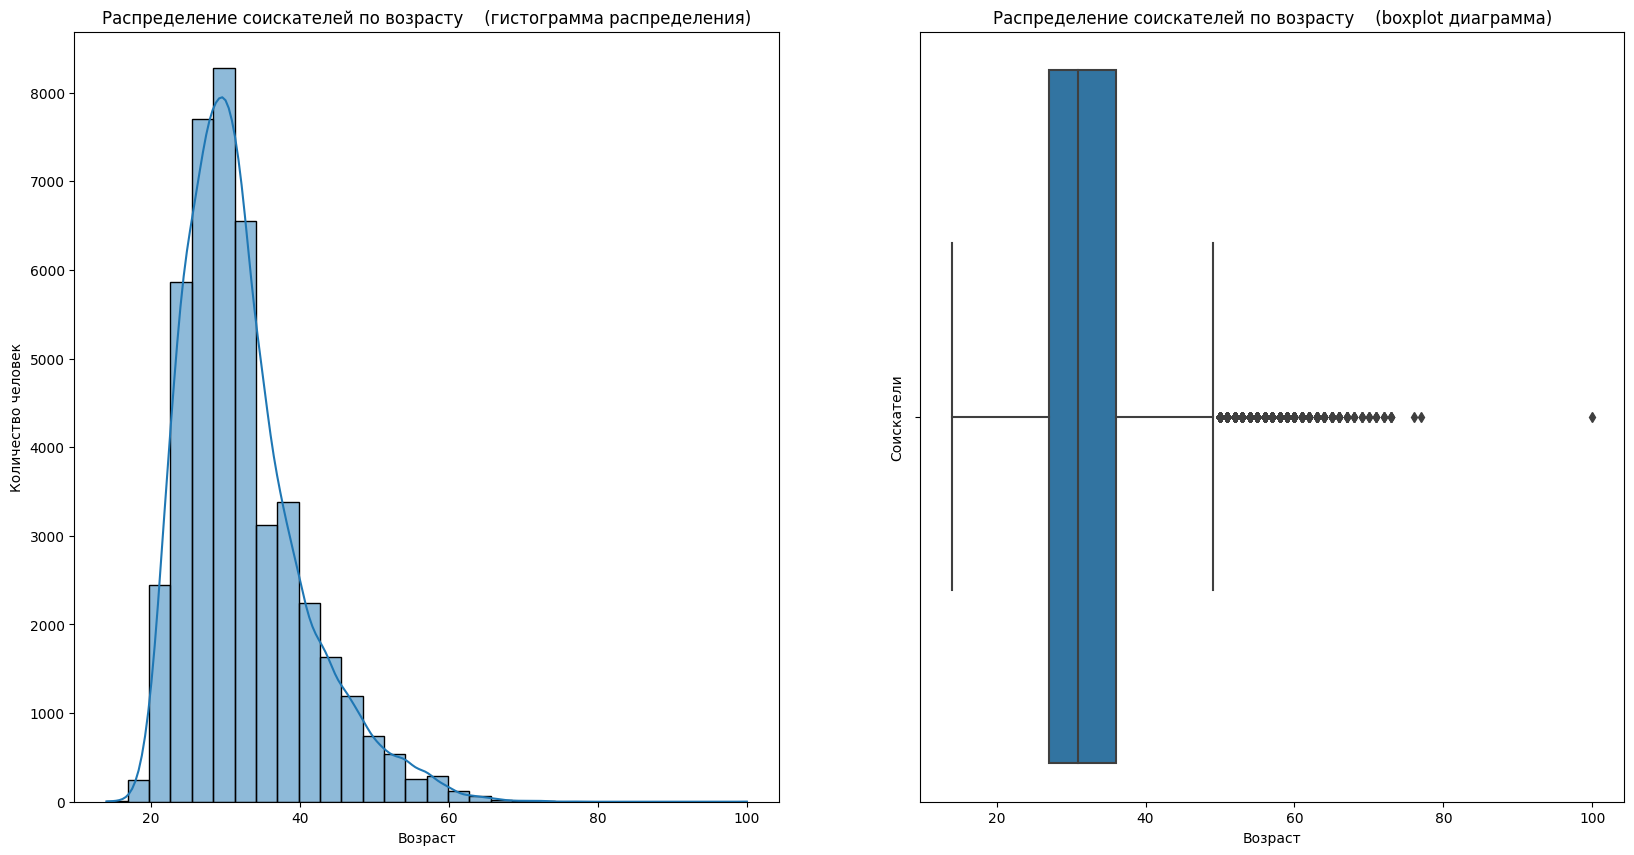

In [284]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

histplot_age = sns.histplot(
    data=head_hunter,
    x='Возраст',
    bins=30,
    kde=True,
    ax= axes[0]
)
histplot_age.set_ylabel('Количество человек')
histplot_age.set_title('Распределение соискателей по возрасту\
    (гистограмма распределения)')

boxplot_age = sns.boxplot(
    data=head_hunter,
    x='Возраст',
    orient='h',
    width=0.9,
    ax=axes[1]
)
boxplot_age.set_ylabel('Соискатели')
boxplot_age.set_title('Распределение соискателей по возрасту\
    (boxplot диаграмма)')

mode_age = head_hunter['Возраст'].mode()
max_age = head_hunter['Возраст'].max()
min_age = head_hunter['Возраст'].min()

print(f'\
Максимальное значение: {max_age}\n\
Модальное значение: {mode_age[0]}\n\
Минимальное значение: {min_age}'
);

Распределение имеет вид приближено лог-нормального распределения, из всех выбросов реальными можно считать значение в 100 лет, остальные выбросы, хоть и являются выбросами с точки зрения математического подхода, вполне могут быть реальными показателями возраста соискателей.

Модальное значение равно 30 годам. Основная часть соискателей распределены в пределах 27-37 лет(примерно). Отклонение медианного значения от среднего (при рассмотрении boxplot-а) не значительно.

Минимальное значение возраста соискателей равно 14 годам (что забегая вперед подпадет под понятие выброса, после применения z-метода).

---

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Максимальное значение: 1188.0
Модальное значение: 81.0
Минимальное значение: 1.0


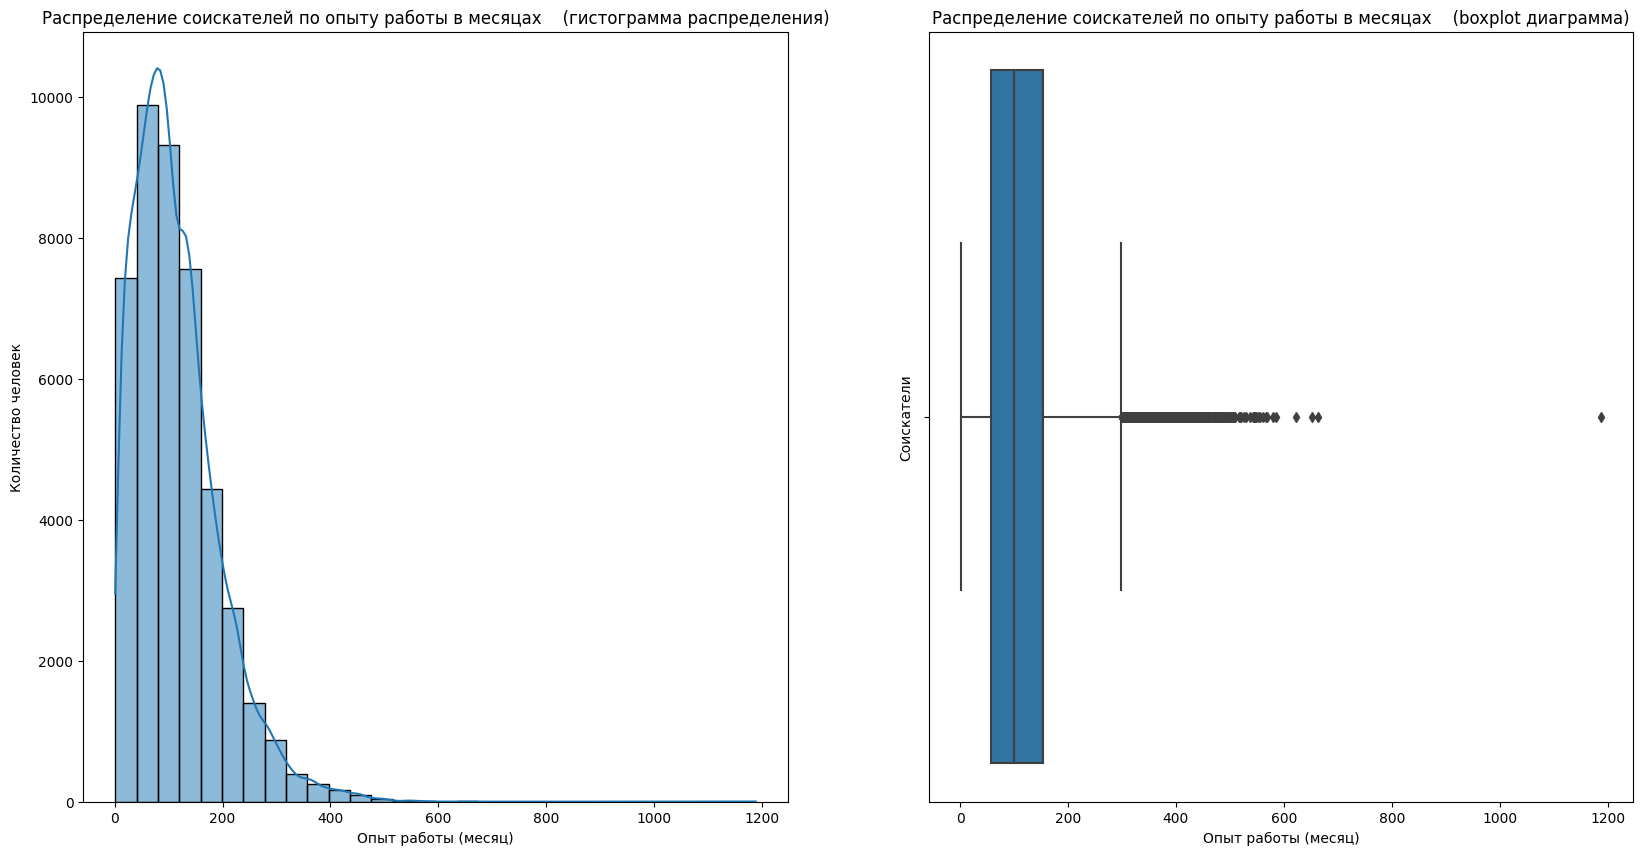

In [285]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

histplot_exp = sns.histplot(
    data=head_hunter,
    x='Опыт работы (месяц)',
    bins=30,
    kde=True,
    ax= axes[0]
)
histplot_exp.set_ylabel('Количество человек')
histplot_exp.set_title('Распределение соискателей по опыту работы в месяцах\
    (гистограмма распределения)')

boxplot_exp = sns.boxplot(
    data=head_hunter,
    x='Опыт работы (месяц)',
    orient='h',
    width=0.9,
    ax=axes[1]
)
boxplot_exp.set_ylabel('Соискатели')
boxplot_exp.set_title('Распределение соискателей по опыту работы в месяцах\
    (boxplot диаграмма)')

mode_exp = head_hunter['Опыт работы (месяц)'].mode()
max_exp = head_hunter['Опыт работы (месяц)'].max()
min_exp = head_hunter['Опыт работы (месяц)'].min()

print(f'\
Максимальное значение: {max_exp}\n\
Модальное значение: {mode_exp[0]}\n\
Минимальное значение: {min_exp}'
);

Распределение имеет вид приближено лог-нормального распределения. Выбросы, хоть и являются выбросами с точки зрения математического подхода, но при ближайшем рассмотрении таковыми не являются.

Модальное значение равно 81 месяцу. Основная часть соискателей распределены в пределах 0-180 месяцев(примерно).

Минимальное значение опыта соискателей равно 1 месяцу.

---

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


Максимальное значение: 24304876.0
Модальное значение: 50000.0
Минимальное значение: 1.0
Медианное значение: 59019.0


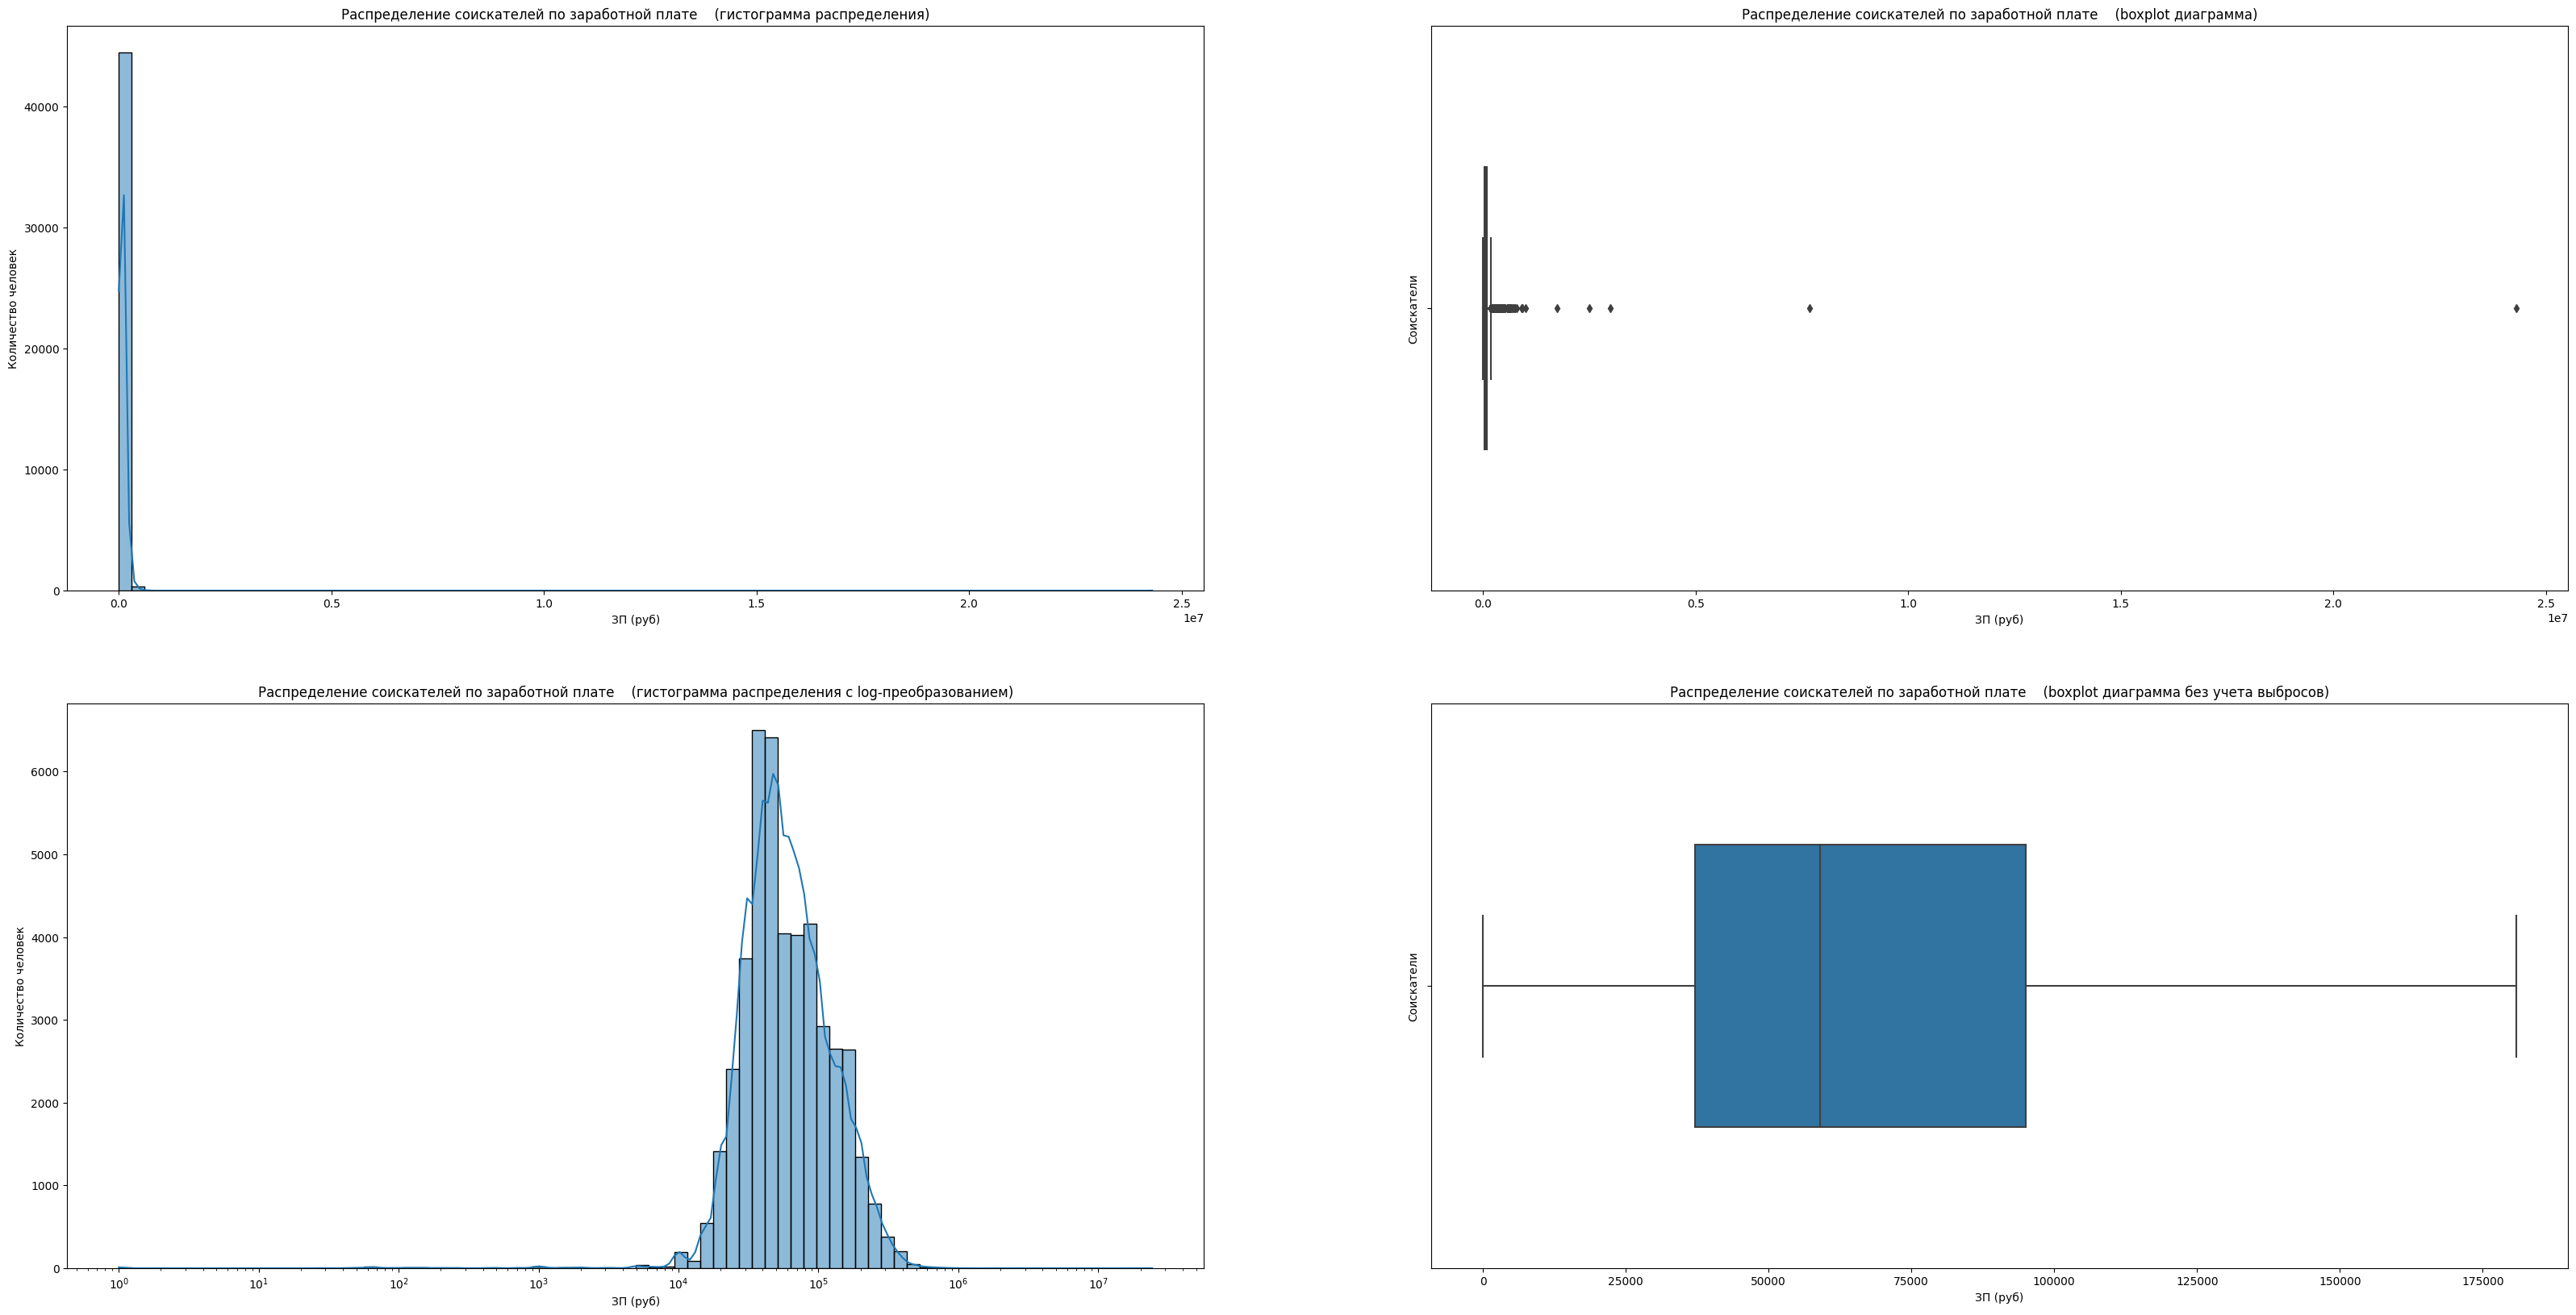

In [286]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(40, 20))

histplot_salary = sns.histplot(
    data=head_hunter,
    x='ЗП (руб)',
    bins=80,
    kde=True,
    ax= axes[0][0]
)
histplot_salary.set_ylabel('Количество человек')
histplot_salary.set_title('Распределение соискателей по заработной плате\
    (гистограмма распределения)')

histplot_salary_log = sns.histplot(
    data=head_hunter,
    x='ЗП (руб)',
    log_scale=True,
    bins=80,
    kde=True,
    ax= axes[1][0]
)
histplot_salary_log.set_ylabel('Количество человек')
histplot_salary_log.set_title('Распределение соискателей по заработной плате\
    (гистограмма распределения с log-преобразованием)')

boxplot_salary = sns.boxplot(
    data=head_hunter,
    x='ЗП (руб)',
    orient='h',
    width=0.5,
    ax=axes[0][1]
)
boxplot_salary.set_ylabel('Соискатели')
boxplot_salary.set_title('Распределение соискателей по заработной плате\
    (boxplot диаграмма)')

boxplot_salary_wooutl = sns.boxplot(
    data=head_hunter,
    x='ЗП (руб)',
    orient='h',
    showfliers = False,
    width=0.5,
    ax=axes[1][1]
)
boxplot_salary_wooutl.set_ylabel('Соискатели')
boxplot_salary_wooutl.set_title('Распределение соискателей по заработной плате\
    (boxplot диаграмма без учета выбросов)')

mode_salary = head_hunter['ЗП (руб)'].mode()
max_salary = head_hunter['ЗП (руб)'].max()
min_salary = head_hunter['ЗП (руб)'].min()
median_salary = head_hunter['ЗП (руб)'].median()

print(f'\
Максимальное значение: {max_salary}\n\
Модальное значение: {mode_salary[0]}\n\
Минимальное значение: {min_salary}\n\
Медианное значение: {median_salary}'
);

Для оценки распределения соискателей по фиту зп необходимо провести логорифмирование иначе графики не информативны, что представлено в первой строке.

После логарифмирования и отсечения выбросов (в частности после отброса максимального значения в 24 млн.руб.), картина представляется более менее понятной, но нужно учитывать, что часть выбросов может быть и не выбросами вовсе, но для анализа в момене это не существенно.

Модальное значение равно 50 000 рублей.

Медианное значение равно 59 019 рублей.

Минимальное значение равно 1 рубль, что по всей видимости выброс.

Основная часть соискателей распределены в пределах 30 000 -90 000 рублей(примерно).

---

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [306]:
mask = head_hunter['ЗП (руб)'] < 1000000
hh_sal_ed_median = head_hunter[mask].groupby(by='Образование', as_index=False)['ЗП (руб)'].median()

fig = px.scatter(
    data_frame=hh_sal_ed_median,
    x='ЗП (руб)',
    y='Образование',
    title='Зависимость медианной зп от уровня образования',
    log_x=False,
    log_y=False,
    color='Образование',
    width=600,
    height=400,
)

fig.write_html("images/scatter_median_salary_ed.html")
fig.show()

https://github.com/hotdonkey/data_science_learning/blob/main/Project_1/images/scatter_median_salary_ed.html#L1

Видна прямая зависимость уровня зп и уровня образования (чем выше уровень образования, тем выше и зп). Стоит отметить, что медианное значение зп в группе среднего образования и среднеспециального равны, что говорит нам о слабом влиянии специальности на уровень желаемой зп соискателя.

---

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [307]:
mask = head_hunter['ЗП (руб)'] < 1000000
hh_sal_loc = head_hunter[mask].groupby(by='Город', as_index=False)['ЗП (руб)'].value_counts()

fig = px.scatter(
    data_frame=hh_sal_loc,
    x='count',
    y='ЗП (руб)',
    title='Зависимость зп от дислокации соискателя',
    log_x=False,
    log_y=False,
    color='Город',
    size='count',
    width=1000,
    height=500,
)

fig.write_html("images/scatter_salary_location.html")
fig.show()

https://github.com/hotdonkey/data_science_learning/blob/main/Project_1/images/scatter_salary_location.html

Наибольшее количество соискателей распределено между группами дислокации: "Москва" и "другие". При том нужно отметить, что диапазон разброса показателя заработная плата укладывается в пределы 0-200 тыс.руб, при этом зарплата группы "Москва" предсказуемо превашает показатель других групп.

---

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

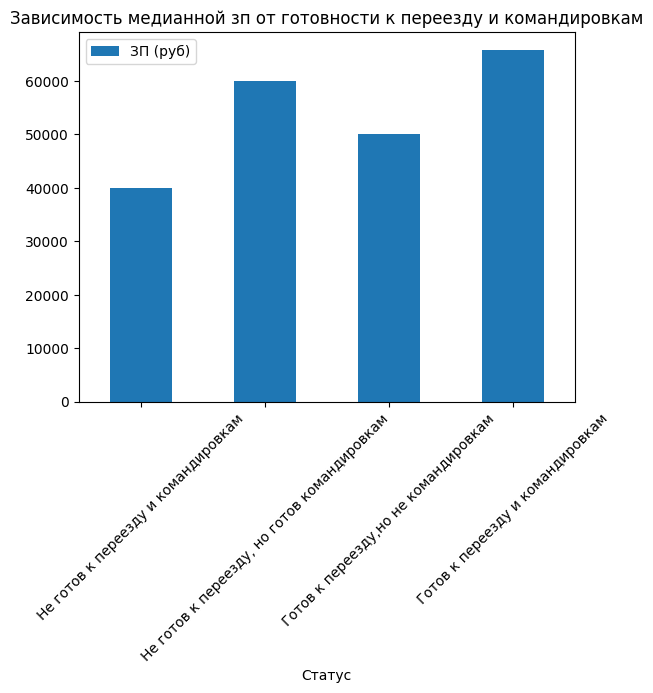

In [289]:
barplot_data2 = pd.DataFrame(
    head_hunter.groupby(
        by=['Готовность к переезду', 'Готовность к командировкам'],
        as_index=False)['ЗП (руб)'].median()
)

barplot_data2['Статус'] = [
    'Не готов к переезду и командировкам',
    'Не готов к переезду, но готов командировкам',
    'Готов к переезду,но не командировкам',
    'Готов к переезду и командировкам']
barplot_data2.plot.bar(x='Статус', y='ЗП (руб)')

plt.xticks(rotation=45)
plt.title('Зависимость медианной зп от готовности к переезду и командировкам');

Данное распределение показывает влияние факторов на формирование ожидаемой заработной платы в следующем порядке:
    
    -Готов к командировкам - наибольшее (как положительное так и отрицательное) влияние фактора.
    -Готов к переезду - на удивление фактор отвечающий за перманентную релокацию оказывает меньшее влияние на итоговый показатель.

---

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

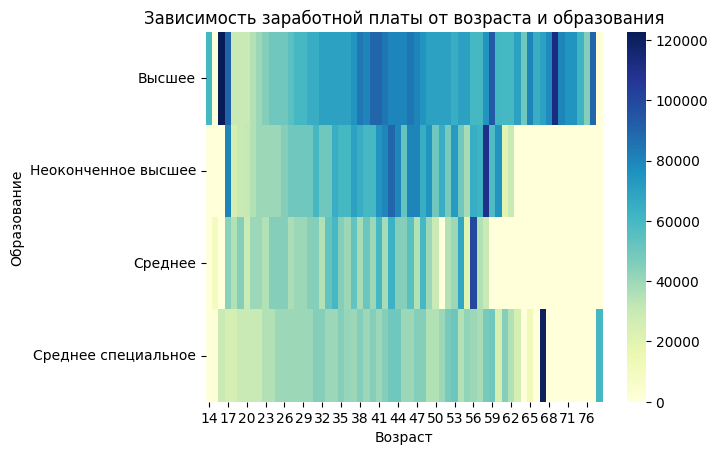

In [290]:
ed_pivot = pd.pivot_table(
    data=head_hunter,
    values='ЗП (руб)',
    columns='Возраст',
    index='Образование',
    aggfunc='median',
    fill_value=0
)

heatmap = sns.heatmap(data=ed_pivot, cmap='YlGnBu')
heatmap.set_title('Зависимость заработной платы от возраста и образования', fontsize=12)
plt.show()

Для группы "Высшее образование" характерен более высокий уровень заработной платы на всем диапазоне возраста, так же необходимо отметить наличие выбросов на диапазоне до 23 лет (что обусловлено нереалистичностью).

Группа "Неоконченное высшее образование" уступает по уровню зп предыдущей группе, а так же диапазон влияния фактора "возраст"  уже и оканчивается на отметке 62 года.

Группы "Среднее" и "Средне специальное образование" в целом тождественны, ща исключением наличия ряда выбросов в конце распределения группы "Средне специальное образование".

---

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

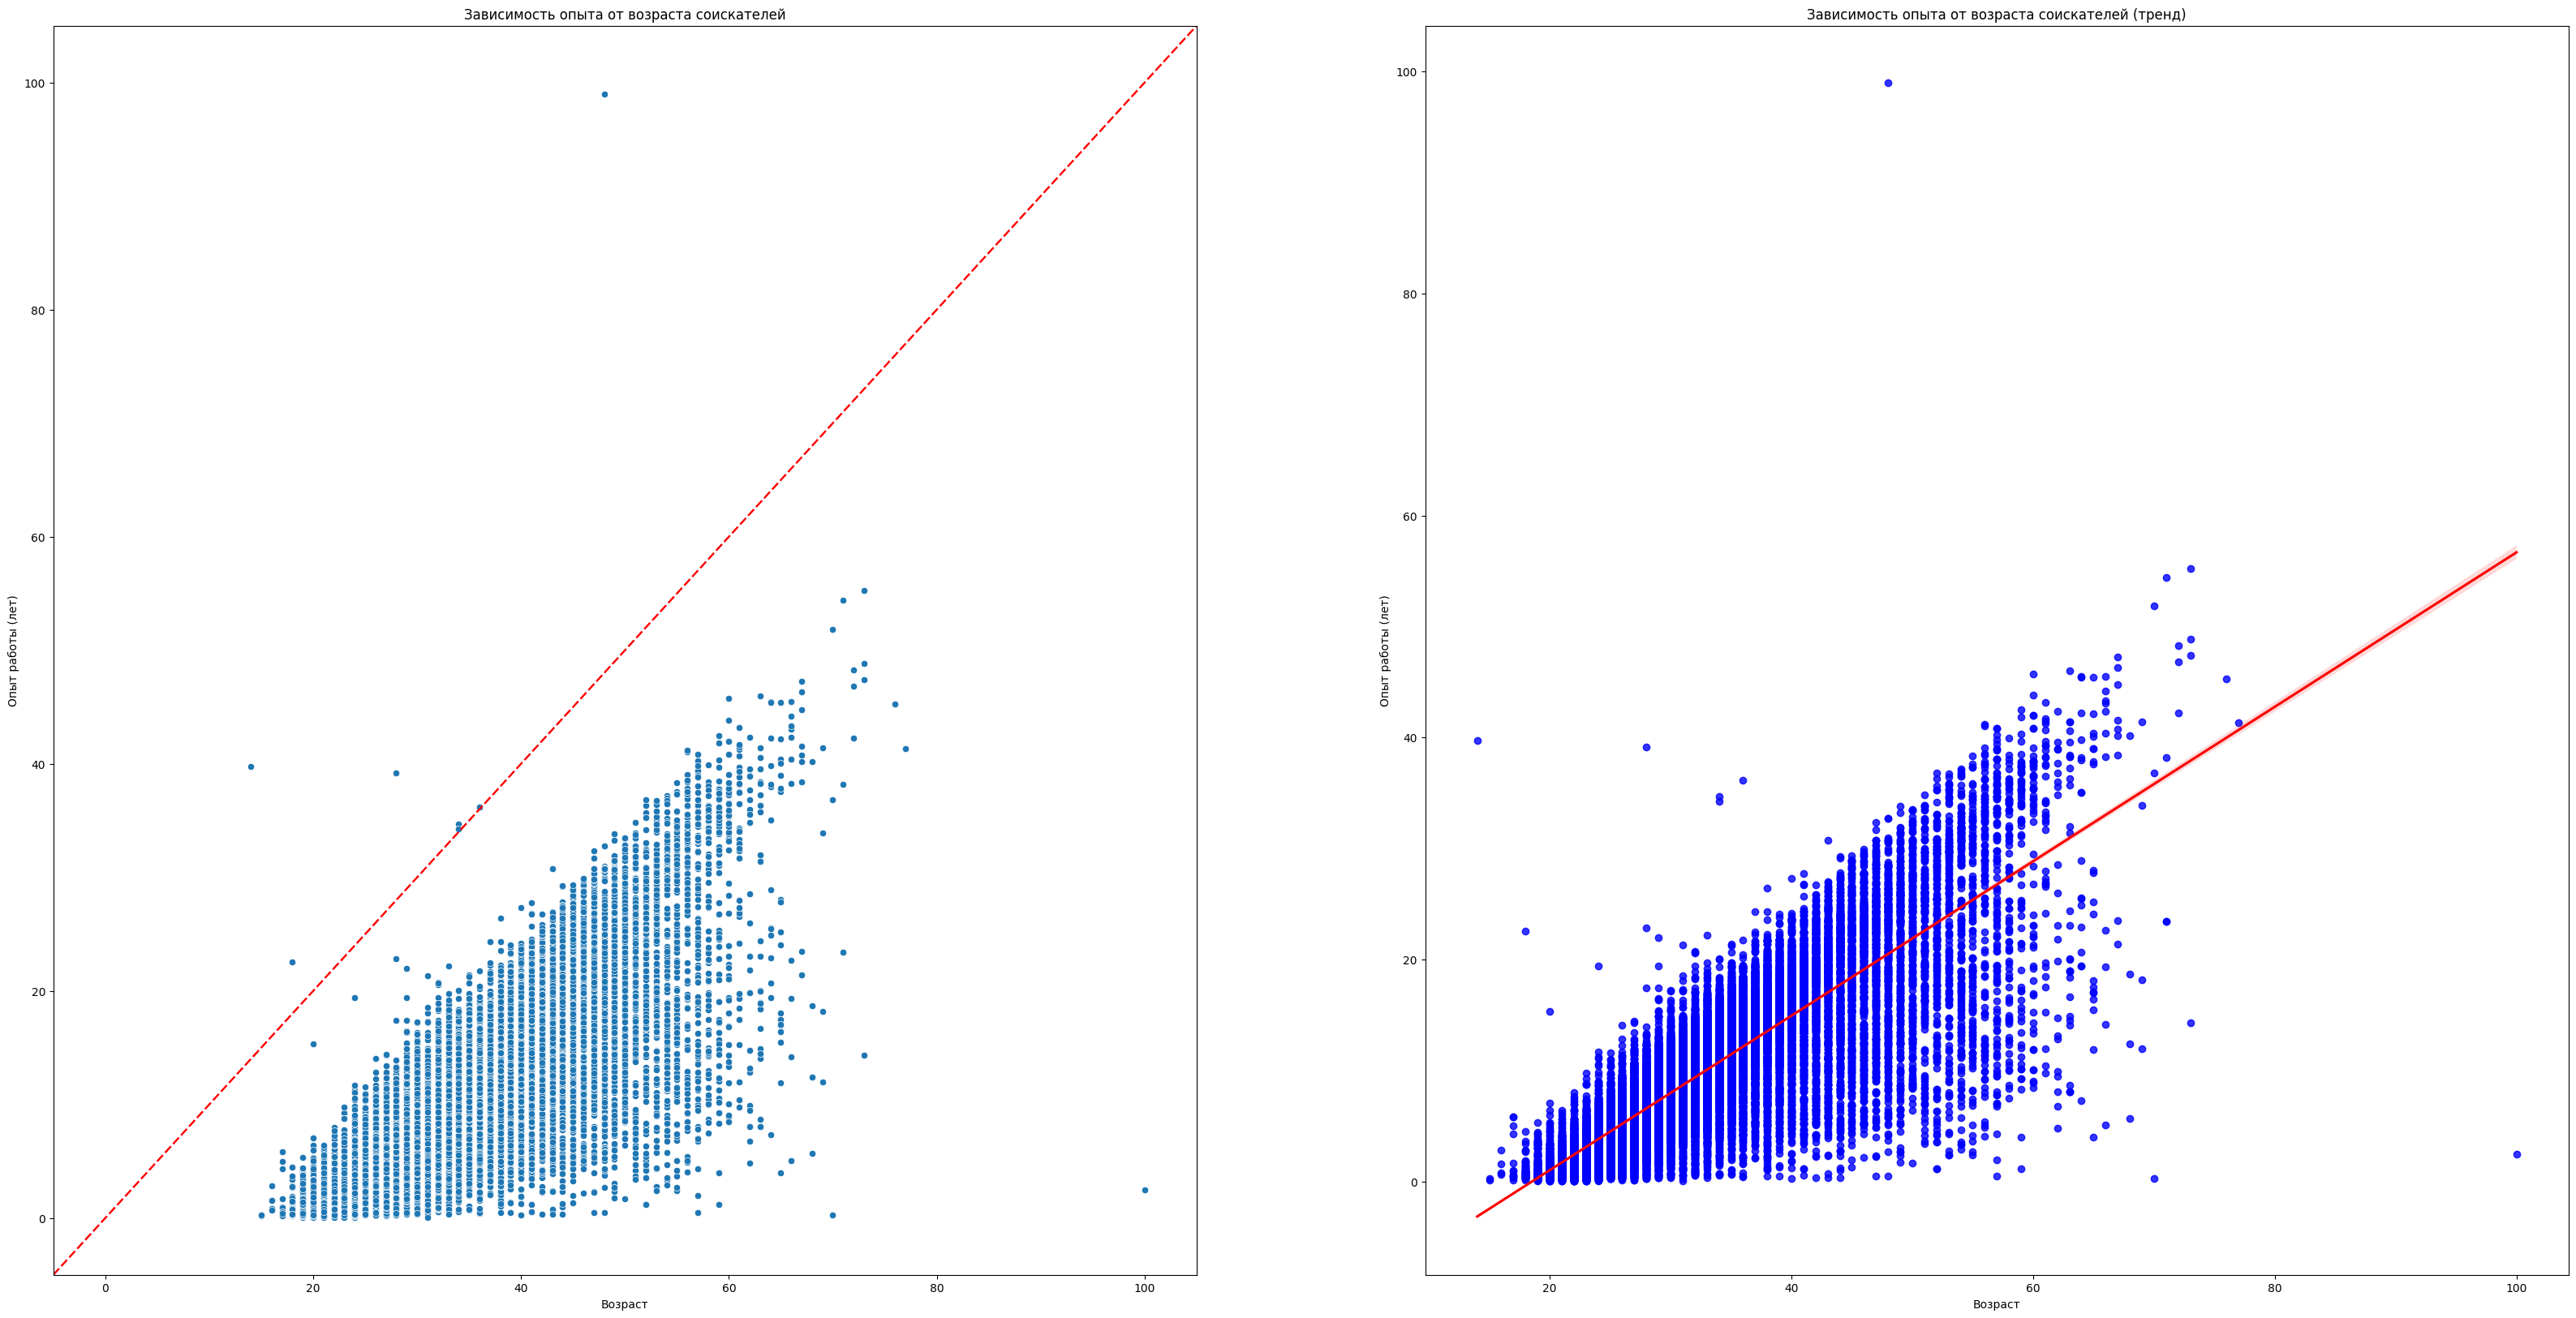

In [291]:
head_hunter['Опыт работы (лет)'] = round(head_hunter['Опыт работы (месяц)']/12,2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(40, 20))

scatter_age_exp = sns.scatterplot(
    data=head_hunter,
    x='Возраст', 
    y='Опыт работы (лет)',
    ax= axes[0]
)

scatter_age_exp.set_title('Зависимость опыта от возраста соискателей')

scatter_age_exp.axline(xy1=(0, 0), xy2=(100, 100),color="r", dashes=(5, 2))
scatter_age_exp.axline(xy1=(0, 0), xy2=(100, 100),color="r", dashes=(5, 2))

scatter_trend = sns.regplot(
    data=head_hunter,
    x='Возраст', 
    y='Опыт работы (лет)',
    scatter_kws={"color": "blue"}, 
    line_kws={"color": "red"}, 
    ax=axes[1]
)
scatter_trend.set_title('Зависимость опыта от возраста соискателей (тренд)');

Прим. к выводу графика: при обновлении ячейки выбросы будут отсекаться.

За исключением выбросов охарактеризованых превалированием показателя "Опыт" над показателем "Возраст" можно видеьб прямую взаимосвязь между возрастом и опытом работы.

---

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


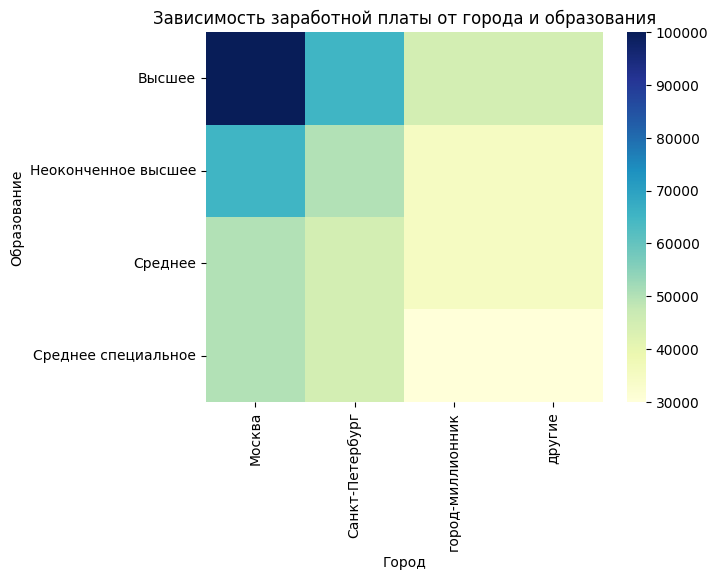

In [292]:
ed_city_pivot = pd.pivot_table(
    data=head_hunter,
    values='ЗП (руб)',
    columns='Город',
    index='Образование',
    aggfunc='median',
    fill_value=0
)

heatmap = sns.heatmap(data=ed_city_pivot, cmap='YlGnBu')
heatmap.set_title('Зависимость заработной платы от города и образования', fontsize=12)
plt.show()

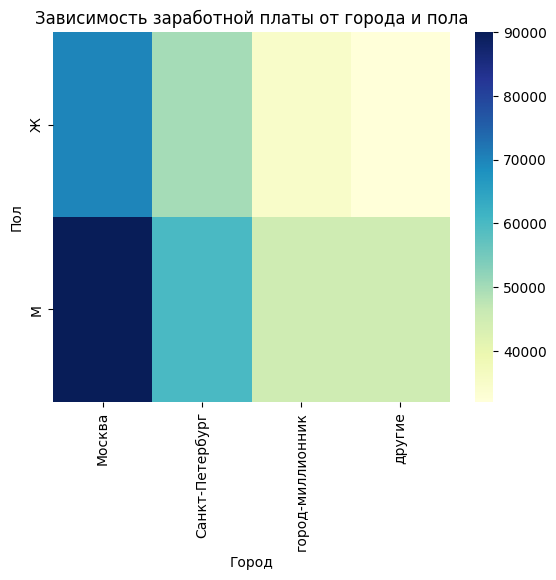

In [300]:
sex_city_pivot = pd.pivot_table(
    data=head_hunter,
    values='ЗП (руб)',
    columns='Город',
    index='Пол',
    aggfunc='median',
    fill_value=0
)

heatmap = sns.heatmap(data=sex_city_pivot, cmap='YlGnBu')
heatmap.set_title('Зависимость заработной платы от города и пола', fontsize=12)
plt.show()

На 1 графике можно видеть, что наибольшую прикладную пользу в формировании ожидаемой заработной платы от образования в целом, и от "Высшего образования" и "Неоконченного высшего" соискатели получают в Москве и Санкт-Петербурге, что формирует отток работников с высоким уровнем образования из регионов в центр.

На 2 графике можно видеть диспропорцию, характерную для всех регионов в разрезе пол-зп. Нужно отметить что в данных существуют выбросы, следовательно картина не является окончательной.

---

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [294]:
head_hunter.drop('Опыт работы (лет)', axis=1, inplace=True)
columns_df = list(head_hunter.columns)

duplicates = head_hunter[head_hunter.duplicated(subset=columns_df)]
head_hunter = head_hunter.drop_duplicates()

print(duplicates.shape[0])

161


---

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [295]:
null_data = head_hunter.isna().sum()
print(null_data)

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
частичная занятость                  0
полная занятость                     0
стажировка                           0
проектная работа                     0
волонтерство                         0
гибкий график                        0
полный день                          0
удаленная работа                     0
вахтовый метод                       0
сменный график                       0
ЗП (руб)                             0
dtype: int64


---

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [296]:
values = {'Опыт работы (месяц)': head_hunter['Опыт работы (месяц)'].median()}
head_hunter = head_hunter.fillna(values)

head_hunter = head_hunter.dropna(
    how='any',
    axis=0,
    subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность']
)

#Чему равно результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков? Ответ округлите до целых.
print(round(head_hunter['Опыт работы (месяц)'].mean()))

114


---

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [297]:
drop_data = head_hunter[(head_hunter['ЗП (руб)'] > 1000000) | (head_hunter['ЗП (руб)'] < 1000)].index
head_hunter = head_hunter.drop(drop_data, axis=0)

#Сколько выбросов вы нашли?
print(drop_data.shape)

(89,)


---

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [298]:
drop_data_age = head_hunter[head_hunter['Возраст'] < head_hunter['Опыт работы (месяц)']/12].index
head_hunter = head_hunter.drop(drop_data_age, axis=0)

#Сколько выбросов вы нашли?
print(drop_data_age.shape[0])

7


---

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Результирующее количество отклонений по z-методу: 3
Результирующее количество строк в очищенной таблице: 44482


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,полная занятость,стажировка,проектная работа,волонтерство,гибкий график,полный день,удаленная работа,вахтовый метод,сменный график,ЗП (руб)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-06-04,Не указано,Среднее,М,15,2.0,Санкт-Петербург,...,False,False,False,False,True,False,True,False,True,10000.0
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-09-04,Не указано,Среднее специальное,М,15,3.0,другие,...,True,False,False,False,False,True,False,False,False,2000.0
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,Среднее специальное,М,100,30.0,Санкт-Петербург,...,True,True,True,False,True,True,True,False,False,60000.0


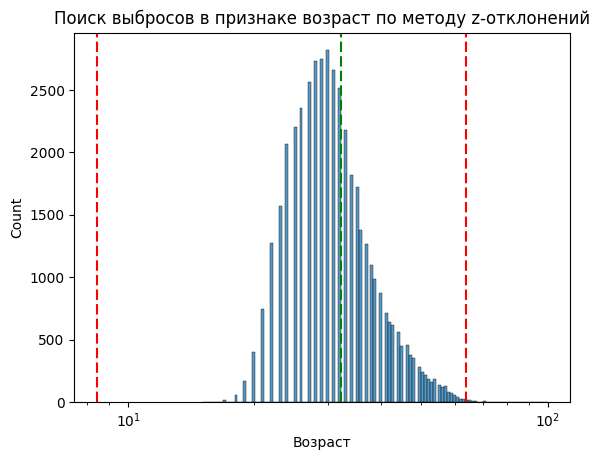

In [299]:
def outliers_z_score(data, feature, left_mod=3, right_mod=3, log_scale=False):    
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    
    mu = x.mean()
    
    sigma = x.std()
    
    lower_bound = mu - left_mod * sigma
    
    upper_bound = mu + right_mod * sigma
    
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    
    print(f'Результирующее количество отклонений по z-методу: {outliers.shape[0]}')
    print(f'Результирующее количество строк в очищенной таблице: {cleaned.shape[0]}')
    
    return outliers, cleaned

outliers, cleaned = outliers_z_score(data=head_hunter, feature='Возраст', log_scale=True, right_mod=4)

#Для графика
lower_bound = head_hunter['Возраст'].mean() - 3*head_hunter['Возраст'].std()
upper_bound = head_hunter['Возраст'].mean() + 4*head_hunter['Возраст'].std()

final_hist = sns.histplot(
    data=head_hunter,
    x='Возраст',
    log_scale=True
)
final_hist.set_title('Поиск выбросов в признаке возраст по методу z-отклонений')
final_hist.axvline(head_hunter['Возраст'].mean(), color="g", dashes=(5, 2))
final_hist.axvline(lower_bound, color="r", dashes=(5, 2))
final_hist.axvline(upper_bound, color="r", dashes=(5, 2))

head_hunter = cleaned

display(outliers);

Под категорию выбросов попали соискатели в возрасте 15 (2 человека) и 100 лет (1 человек).